In [270]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [271]:
# Reading data 

df = pd.read_csv("housing.csv", encoding = 'utf-8')

In [272]:
# Overview of top rows of the data

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [273]:
# General information about the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [274]:
# Summary statistics about the data 

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Dealing with missing data 

In [275]:
# Check how many NaN values in each column

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

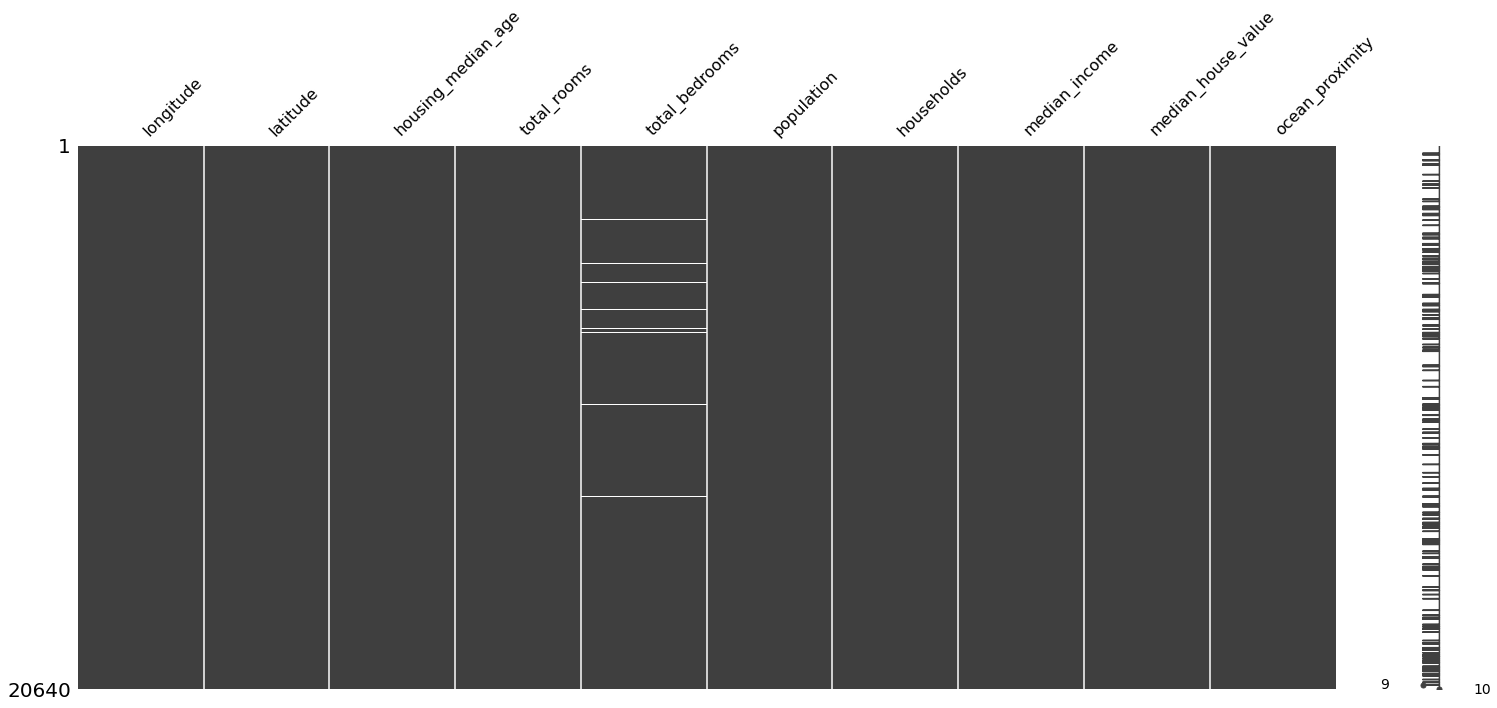

In [276]:
# Below matrix show the missing values in each column as white horizontal spaces

msno.matrix(df)
plt.show()

In [277]:
# Check duplicates 

print(df.duplicated().sum())

0


**Dealing with missing values in total_bedrooms column**

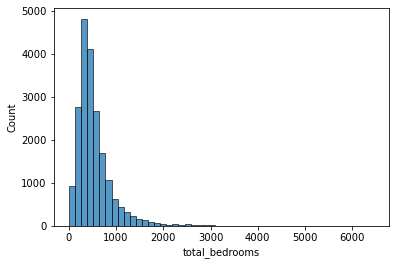

In [278]:
# Distribution of the total_bedrooms column 

sns.histplot(data=df, x="total_bedrooms", bins = 50)
plt.show()

In [279]:
# Get to know measures of center for total_bedrooms column

df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [280]:
# calculating the median so that we can replace the NaN values with the median 

median_bedrooms  = df['total_bedrooms'].median()
median_bedrooms

435.0

In [282]:
# fill NaN values with median

df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)

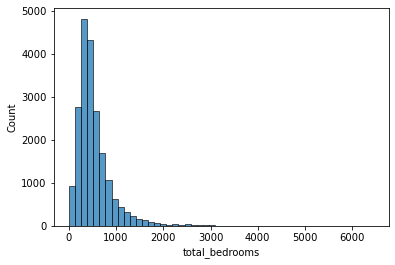

In [283]:
# re-check the distribution of total_bedrooms column after replacing the nan values to ensure that we did't change it 

sns.histplot(data=df, x="total_bedrooms", bins = 50)
plt.show()

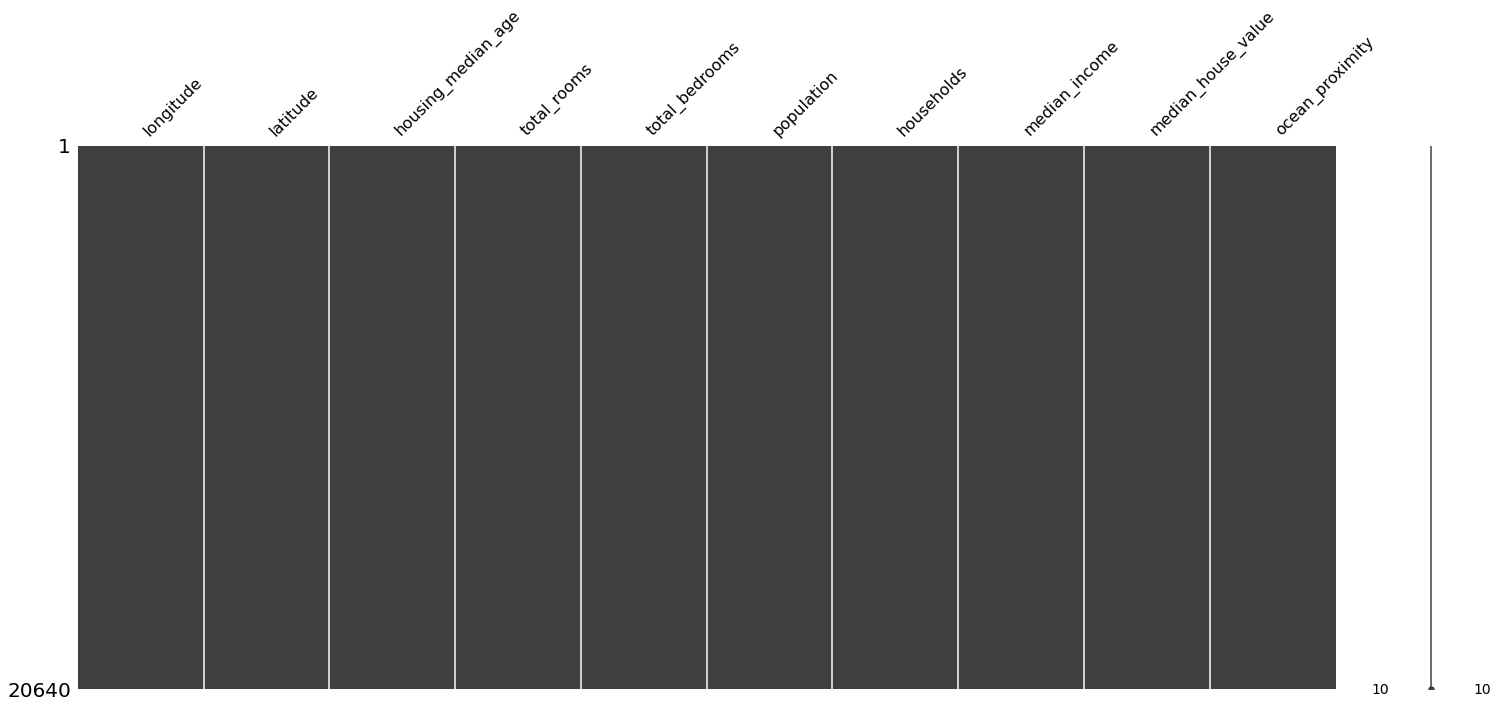

In [284]:
# checking missing values

msno.matrix(df)
plt.show()

In [285]:
# recheck number of nan in our data

df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

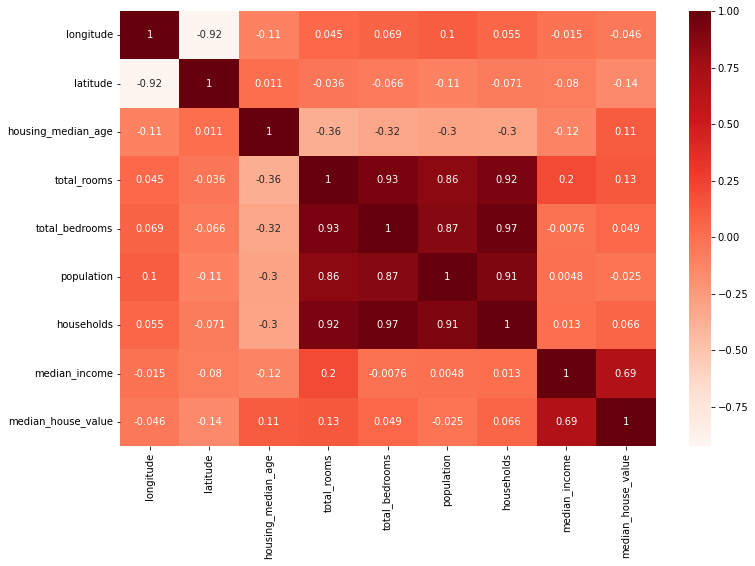

In [286]:
# heatmap to know if there is a Correlation between any columns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap = 'Reds')
plt.show()

# Check outliers

In [287]:
# get the column names to easily navigate between them 

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### households

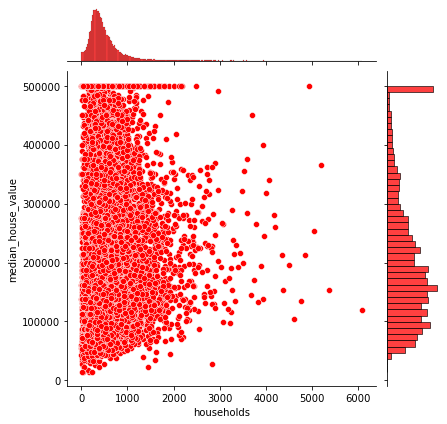

In [288]:
# checking outliers in households column
sns.jointplot(x=df["households"], y=df["median_house_value"], kind='scatter', color = "r")
plt.show()

In [289]:
#removing values above 3000
df.drop(df[df['households'] > 3000].index, inplace = True)

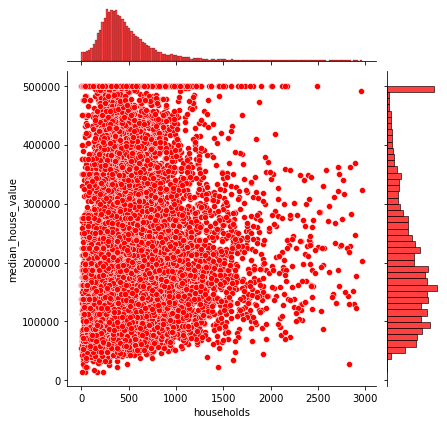

In [290]:
# checking again that we solved the outliers problem 
sns.jointplot(x=df["households"], y=df["median_house_value"], kind='scatter', color = 'r')
plt.show()

### population

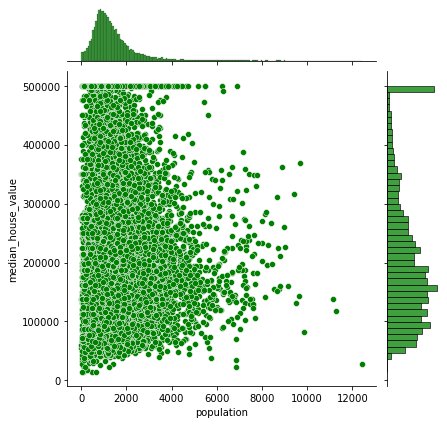

In [291]:
#checking outliers in population column
sns.jointplot(x=df["population"], y=df["median_house_value"], kind='scatter', color = "g")
plt.show()

In [292]:
#removing values above 9000
df.drop(df[df['population'] > 9000].index, inplace = True)

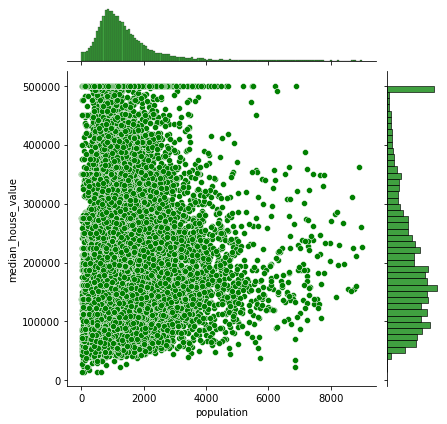

In [293]:
# checking again that we solved the outliers problem 
sns.jointplot(x=df["population"], y=df["median_house_value"], kind='scatter', color = "g")
plt.show()

### total_rooms

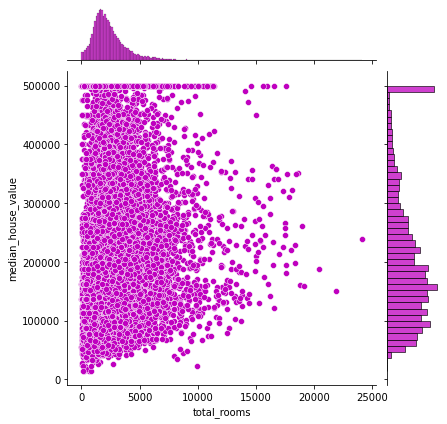

In [294]:
#checking outliers in total_rooms column
sns.jointplot(x=df["total_rooms"], y=df["median_house_value"], kind='scatter', color = "m")
plt.show()

In [295]:
# removing values above 20k
df.drop(df[df['total_rooms'] > 20000].index, inplace = True)

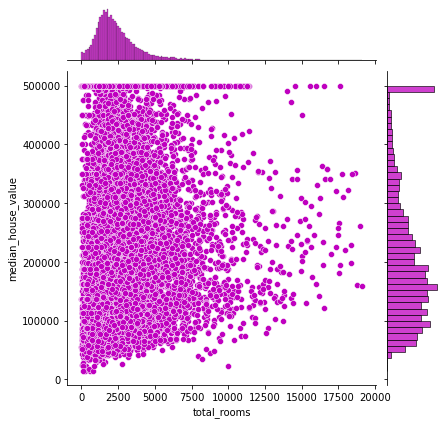

In [296]:
# re-check that we solved the problem
sns.jointplot(x=df["total_rooms"], y=df["median_house_value"], kind='scatter', color = "m")
plt.show()

### total_bedrooms 

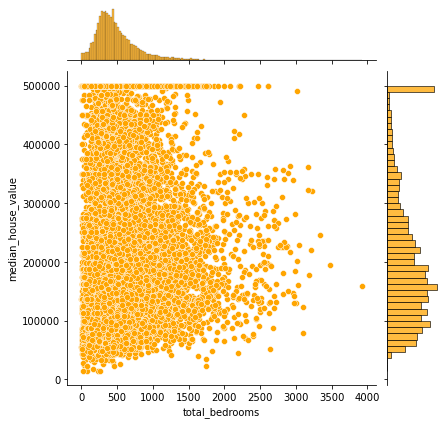

In [297]:
#checking outliers in total_bedrooms column
sns.jointplot(x=df["total_bedrooms"], y=df["median_house_value"], kind='scatter', color = "orange")
plt.show()

In [298]:
# removing values above 3500
df.drop(df[df['total_bedrooms'] > 3500].index, inplace = True)

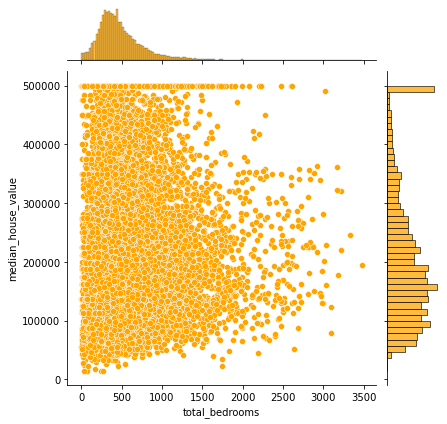

In [299]:
# # re-check that we solved the problem
sns.jointplot(x=df["total_bedrooms"], y=df["median_house_value"], kind='scatter', color = "orange")
plt.show()

In [300]:
# check number of data rows we have after removing some outliers
df.shape

(20579, 10)

## Mapping/ Encoding

In [301]:
# As Machine Model Understands Only Numeric Language So We Have To transform ocean_proximity column from categories to numbers

df['ocean_proximity']=df['ocean_proximity'].map({'<1H OCEAN': 0,'INLAND':1,'NEAR OCEAN':2,'NEAR BAY':3,'ISLAND':4})
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


## Split the data

In [302]:
# selecting the columns that i will use it in the model
house = df[['housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity']]

In [303]:
# drop the target column in x variable
x = house.drop('median_house_value',axis = 1).values
# save target column in y variable
y = house['median_house_value'].values

## Train test split

In [304]:
# split my data to train and test with 20:80 ratio 
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.20)
x_train

array([[4.7000e+01, 9.3200e+02, 2.9500e+02, ..., 2.6400e+02, 1.6065e+00,
        0.0000e+00],
       [5.2000e+01, 2.8000e+02, 7.1000e+01, ..., 7.1000e+01, 1.4844e+00,
        2.0000e+00],
       [1.6000e+01, 2.6040e+03, 4.5400e+02, ..., 4.8100e+02, 4.6628e+00,
        1.0000e+00],
       ...,
       [3.6000e+01, 2.9160e+03, 7.8500e+02, ..., 7.4900e+02, 3.5985e+00,
        2.0000e+00],
       [3.2000e+01, 3.4610e+03, 6.6500e+02, ..., 6.4900e+02, 2.9244e+00,
        1.0000e+00],
       [1.4000e+01, 1.7100e+03, 2.9400e+02, ..., 2.9700e+02, 4.7143e+00,
        1.0000e+00]])

## Data scaling 

In [305]:
# scaling the data 
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)


## Linear regression model

In [306]:
# performing the linear regression model

reg = linear_model.LinearRegression()

In [307]:
reg.fit(x_train , y_train)

LinearRegression()

In [308]:
reg.score(x_train , y_train)

0.5743300110271604

In [309]:
reg.score(x_test , y_test)

0.5662330655725716

In [310]:
reg.intercept_

188756.34187695818

In [311]:
reg.coef_

array([ 35686.4933944 , -33613.0504923 ,  28861.17534347, -42637.25817974,
        56143.98875134, 103109.51020913,    161.75980256])

In [312]:
pd.DataFrame(reg.coef_ , house.columns[:-1] , columns=['Coeficient'])

,Coeficient
housing_median_age,35686.493394
total_rooms,-33613.050492
total_bedrooms,28861.175343
population,-42637.258180
households,56143.988751
median_income,103109.510209
median_house_value,161.759803


In [313]:
y_pred = reg.predict(x_test)
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df1.head(10)

,Y_test,Y_pred
0,325900.0,277904.737721
1,299700.0,261553.070984
2,225000.0,167442.234969
3,192300.0,166184.013851
4,162500.0,88788.393850
5,360600.0,312737.039305
6,350600.0,242878.024833
7,143400.0,156685.990322
8,135800.0,178755.352440
9,285200.0,270462.336229


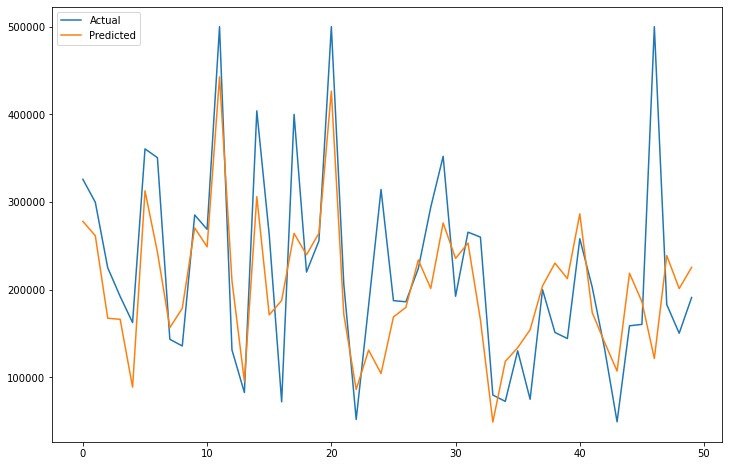

In [316]:
plt.figure(figsize=(12,8))
plt.plot(df1[:50])
plt.legend(['Actual' , 'Predicted'])
plt.show()